# PROJETO 2 - Análise Exploratória de Dados

https://www.ibge.gov.br/cidades-e-estados.html?view=municipio

<img src = "Captura de Tela (16).png">

In [127]:
# Importando as bibliotecas que serão utilizadas no trabalho

import pandas as pd #manipulação do dataframe
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats #padronização
import seaborn as sns
import math
import statsmodels.api as sm
import pylab as py
import random
import plotly.express as px

In [128]:
# Lendo o dataset Cidades por meio do Pandas 
df = pd.read_csv('DF_Cidades.csv')

<img src = "Captura de Tela (17).png">

In [129]:
# Visualizando o dataset Cidades
display(df)

,codigo,cidade,prefeito,gentilico,area_territorial,populacao_estimada,densidade_demografica,escolarizacao,idhm,mortalidade_infantil,receitas_realizadas,despesas_empenhadas,pib
0,2300101,Abaiara,AFONSO TAVARES LEITE,abaiarense,180.833,11965,58.69,96.7,0.628,19.87,29043.96,26827.90,9158.04
1,2300150,Acarape,FRANCISCO EDILBERTO BESERRA BARROSO,acarapense,130.002,15140,98.52,96.8,0.606,5.35,38762.54,36800.47,10317.47
2,2300200,Acaraú,ANA FLÁVIA RIBEIRO MONTEIRO,acarauense,842.471,63556,68.31,96.8,0.601,5.92,132656.39,109899.30,13261.89
3,2300309,Acopiara,ANTÔNIO ALMEIDA NETO,acopiarense,2254.279,54687,22.58,97.2,0.595,20.18,153148.71,125356.17,9432.25
4,2300408,Aiuaba,RAMILSON ARAUJO MORAES,aiuabense,2438.563,17584,6.66,97.5,0.569,15.08,37794.63,33776.93,8642.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2313807,Uruburetama,FRANCISCO ALDIR CHAVES DA SILVA,uruburetamense,99.400,22223,203.61,95.9,0.639,14.16,46252.58,42868.59,12349.85
178,2313906,Uruoca,JAN KENNEDY PAIVA AQUINO,uruoquense,697.683,13988,18.49,97.7,0.566,18.52,36175.66,34549.31,13874.25
179,2313955,Varjota,FRANCISCO ELMO BEZERRA MONTE,varjotense,179.239,18520,98.07,96.6,0.611,7.41,51275.61,47814.73,19390.59
180,2314003,Várzea Alegre,JOSÉ HELDER MÁXIMO DE CARVALHO,varzea-alegrense,829.976,41078,45.99,97.0,0.629,10.68,79368.16,71300.30,10609.61


### Notas:
**- Escolarização 6 a 14 anos:** [população residente no município de 6 a 14 anos de idade matriculada no ensino regular/total de população residente no município de 6 a 14 anos de idade] x 100

**- População estimada:** para 'dúvidas e contestações' acesse https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=o-que-e

### Fontes:
**- Área Territorial:** Área territorial brasileira 2020. Rio de Janeiro: IBGE, 2021

**- População estimada:** IBGE, Diretoria de Pesquisas, Coordenação de População e Indicadores Sociais, Estimativas da população residente com data de referência 1o de julho de 2020

**- Densidade demográfica:** IBGE, Censo Demográfico 2010, Área territorial brasileira. Rio de Janeiro: IBGE, 2011
**- Escolarização 6 a 14 anos:** IBGE, Censo Demográfico 2010

**- IDHM Índice de desenvolvimento humano municipal:** Programa das Nações Unidas para o Desenvolvimento - PNUD

**- Mortalidade infantil:** Ministério da Saúde, Departamento de Informática do Sistema Único de Saúde - DATASUS 2017

**- Receitas realizadas:** Contas anuais. Receitas orçamentárias realizadas (Anexo I-C) 2017 e Despesas orçamentárias empenhadas (Anexo I-D) 2017. In: Brasil. Secretaria do Tesouro Nacional, Siconfi: Sistema de Informações Contábeis e Fiscais do Setor Público Brasileiro. Brasília, DF, [2018]. Disponível em: https://siconfi.tesouro.gov.br/siconfi/pages/public/consulta_finbra/finbra_list.jsf. Acesso em: set. 2018

**- Despesas empenhadas:** Contas anuais. Receitas orçamentárias realizadas (Anexo I-C) 2017 e Despesas orçamentárias empenhadas (Anexo I-D) 2017. In: Brasil. Secretaria do Tesouro Nacional, Siconfi: Sistema de Informações Contábeis e Fiscais do Setor Público Brasileiro. Brasília, DF, [2018]. Disponível em: https://siconfi.tesouro.gov.br/siconfi/pages/public/consulta_finbra/finbra_list.jsf. Acesso em: set. 2018

**- PIB per capita:** IBGE, em parceria com os Órgãos Estaduais de Estatística, Secretarias Estaduais de Governo e Superintendência da Zona Franca de Manaus - SUFRAMA

# Análise Descritiva

In [130]:
# Tipos das variáveis do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   codigo                 182 non-null    int64  
 1   cidade                 182 non-null    object 
 2   prefeito               182 non-null    object 
 3   gentilico              182 non-null    object 
 4   area_territorial       182 non-null    float64
 5   populacao_estimada     182 non-null    int64  
 6   densidade_demografica  182 non-null    float64
 7   escolarizacao          182 non-null    float64
 8   idhm                   182 non-null    float64
 9   mortalidade_infantil   169 non-null    float64
 10  receitas_realizadas    182 non-null    float64
 11  despesas_empenhadas    182 non-null    float64
 12  pib                    182 non-null    float64
dtypes: float64(8), int64(2), object(3)
memory usage: 18.6+ KB


In [131]:
df.shape

(182, 13)

In [132]:
# Visualizando o nome das colunas/atributos
df.columns

Index(['codigo', 'cidade', 'prefeito', 'gentilico', 'area_territorial',
       'populacao_estimada', 'densidade_demografica', 'escolarizacao', 'idhm',
       'mortalidade_infantil', 'receitas_realizadas', 'despesas_empenhadas',
       'pib'],
      dtype='object')

## Área Territorial em km² (2022)

In [133]:
# Medidas Resumo da Variável Area Territorial
df['area_territorial'].describe()

count     182.000000
mean      811.805203
std       754.792755
min        72.675000
25%       291.031000
50%       610.628500
75%       991.479000
max      4262.293000
Name: area_territorial, dtype: float64

In [134]:
#Boxplot da variável area_territorial
px.box(df, x = 'area_territorial', points = 'all')

In [77]:
# Criar o gráfico de violino
fig = px.violin(df, x='area_territorial', orientation='h')

# Definir o título do gráfico
fig.update_layout(title_text='Gráfico de Violino - Área Territorial')

# Exibir o gráfico
fig.show()

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



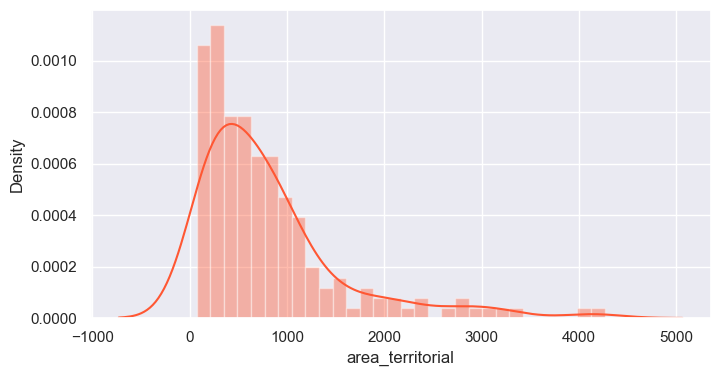

In [135]:
# Analisando a distribuição da variável area_territorial

sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(df['area_territorial'], bins=30, color = '#FF5733')
plt.show()

In [142]:
# Padronizando a variável area_territorial
z_area = stats.zscore(df['area_territorial'])

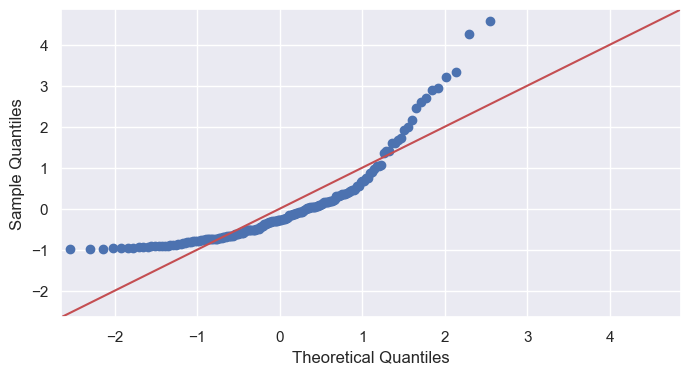

In [137]:
# Plotando o Qqplot da variável area_territorial
sns.set(rc={'figure.figsize':(8,4)})
sm.qqplot(z_area, line ='45') 
py.show() 

### *Best Fit*

In [43]:
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats

In [139]:
dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              't',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

In [141]:
# Função para verificar as possíveis distribuições da variável de estudo:

def check_distribution(dist_names, y_std):
    
    p_values = []
    distance = []
    D_less_p = []
    
    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)

        if distribution != "norm":
            D, p = scipy.stats.kstest(y_std, distribution, args=param)
        else:
            D, p = scipy.stats.kstest(y_std, distribution,  alternative='greater')
            
        p = np.around(p, 5)
        p_values.append(p)    
        
        D = np.around(D, 5)
        distance.append(D)    
        
        if D<p: 
            D_less_p.append("yes") 
        else: 
            D_less_p.append("no")

    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['Distance'] = distance
    results['p_value'] = p_values
    results['D<p'] = D_less_p
    
    results.sort_values(['p_value'], ascending=False, inplace=True)


    print ('\nDistributions sorted by goodness of fit:')
    print ('----------------------------------------')
    print (results)

In [143]:
y_std = scipy.stats.zscore(df['area_territorial'])
y_std = y_std.to_numpy()
y_std

array([-0.83826032, -0.90579042,  0.04074018,  1.91635788,  2.16118319,
       -0.89814079, -0.98195059,  0.44558993,  0.48257066, -0.73347583,
       -0.35581162, -0.44049691,  0.55185706, -0.22294881, -0.62374657,
        0.37933787, -0.91939979,  0.34094094,  0.4561065 ,  0.0983967 ,
       -0.88512659,  0.35761256, -0.27054975, -0.73308125, -0.13346224,
       -0.56624549, -0.66124542,  1.0428176 ,  0.04025527,  2.68790754,
       -0.20877348,  0.410044  ,  0.35973288,  2.9500953 , -0.77752562,
        0.15207031, -0.23598028, -0.07467382,  0.29840167, -0.59595522,
        0.03495314, -0.42997901, -0.03691059,  0.54660807, -0.10871985,
       -0.76331177, -0.68468586,  0.0046004 , -0.08166849,  2.88243236,
        0.43355618, -0.15338741, -0.63222254, -0.45258912, -0.59637238,
       -0.97378948, -0.37366695, -0.32286694, -0.66353314, -0.69984031,
       -0.79913403, -0.77244801,  2.4595838 , -0.93033353, -0.73449082,
       -0.8716753 , -0.73832892, -0.24869822, -0.95784854,  0.15

In [144]:
check_distribution(dist_names, y_std)

C:\Users\victo\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\victo\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.




Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value  D<p
0          beta   0.04906  0.75446  yes
1         expon   0.04988  0.73643  yes
5      pearson3   0.05024  0.72833  yes
2         gamma   0.05152  0.69961  yes
9   weibull_min   0.05180  0.69325  yes
3       lognorm   0.06551  0.39838  yes
10  weibull_max   0.09661  0.06254   no
6             t   0.15006  0.00048   no
4          norm   0.16534  0.00004   no
7        triang   0.37192  0.00000   no
8       uniform   0.56106  0.00000   no


### *Municípios do Ceará com as Maiores Áreas Territoriais*

In [146]:
# Ordenar o DataFrame em ordem decrescente
df_sorted = df.sort_values('area_territorial', ascending=False)

# Selecionar as 20 primeiras linhas (20 cidades com maiores áreas territoriais)
top_20_cidades = df_sorted.head(20)

# Criar o DataFrame a partir da lista
df_top_20_cidades = pd.DataFrame(top_20_cidades, columns=['cidade', 'area_territorial'])
display(df_top_20_cidades)

,cidade,area_territorial
155,Santa Quitéria,4262.293
169,Tauá,4010.618
148,Quixeramobim,3324.987
76,Independência,3222.381
33,Canindé,3032.390
49,Crateús,2981.459
29,Boa Viagem,2835.037
114,Morada Nova,2763.971
62,Granja,2663.174
4,Aiuaba,2438.563


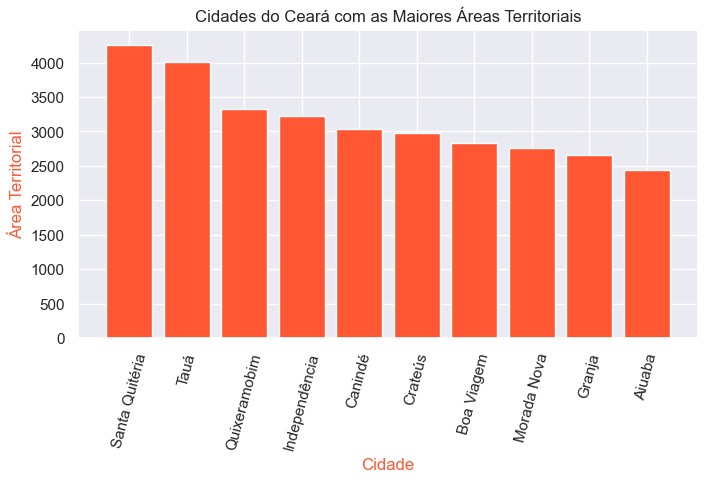

In [147]:
# Ordenar o dataset pela Área Territorial em ordem decrescente
df_sorted = df.sort_values('area_territorial', ascending=False)

# Selecionar as N cidades com os maiores Áreas Territoriais
n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(top_cidades['cidade'], top_cidades['area_territorial'], color = '#FF5733')

# Personalizar o gráfico
plt.title('Cidades do Ceará com as Maiores Áreas Territoriais')
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('Área Territorial', color = '#FF5733')
plt.xticks(rotation=75)

# Mostrar o gráfico
plt.show()

## População Estimada (2021)

In [148]:
# Medidas Resumo da Variável População Estimada
df['populacao_estimada'].describe()

count    1.820000e+02
mean     4.999058e+04
std      2.025529e+05
min      4.784000e+03
25%      1.423400e+04
50%      2.212050e+04
75%      4.103875e+04
max      2.703391e+06
Name: populacao_estimada, dtype: float64

In [149]:
#Boxplot da variável
px.box(df, x = 'populacao_estimada', points = 'all')

In [78]:
# Criar o gráfico de violino
fig = px.violin(df, x='populacao_estimada', orientation='h')

# Definir o título do gráfico
fig.update_layout(title_text='Gráfico de Violino - População Estimada')

# Exibir o gráfico
fig.show()

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



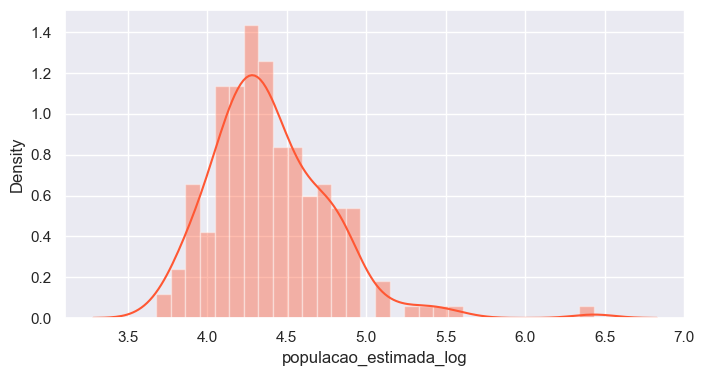

In [213]:
# Analisando a distribuição da variável populacao_estimada

# Converter as variáveis para escala logarítmica
df['populacao_estimada_log'] = np.log10(df['populacao_estimada'])

sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(df['populacao_estimada_log'], bins=30, color = '#FF5733')
plt.show()

In [73]:
# Padronizando a variável populacao_estimada
z_pop_est = stats.zscore(df['populacao_estimada'])

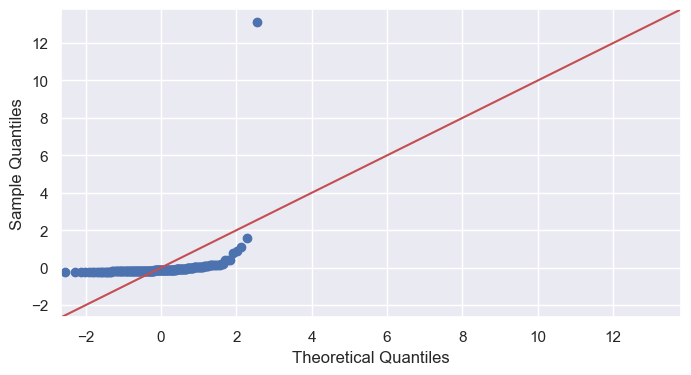

In [74]:
# Plotando o Qqplot da variável populacao_estimada
sns.set(rc={'figure.figsize':(8,4)})
sm.qqplot(z_pop_est, line ='45') 
py.show() 

### *Best Fit*

In [75]:
y_std = scipy.stats.zscore(df['populacao_estimada'])
y_std = y_std.to_numpy()
y_std

array([-1.88249448e-01, -1.72531293e-01,  6.71569563e-02,  2.32500849e-02,
       -1.60432027e-01, -1.88838570e-01, -2.09304350e-01, -1.67892581e-01,
       -2.86916103e-02, -2.10839036e-01, -1.74501632e-01,  1.56391521e-01,
        1.25752258e-01, -1.15797417e-01, -1.93110938e-01, -1.40020703e-01,
       -1.89269272e-01, -2.08631069e-01, -1.30961105e-01, -1.25861987e-01,
       -2.16205487e-01, -1.56823040e-01,  5.77805199e-02, -1.35030498e-01,
       -1.34441377e-01, -1.72882786e-01, -6.86330511e-02,  2.14084617e-02,
       -8.48512167e-02,  2.32154307e-02,  1.01198968e-03,  7.00827609e-02,
       -1.11277520e-01,  1.36108913e-01, -1.59214179e-01, -1.33565121e-01,
       -1.13777573e-01, -1.56045795e-01, -1.54907157e-01, -1.59545870e-01,
        1.12454946e-01, -1.43317803e-01, -1.95947631e-01,  1.57888207e+00,
       -1.20688610e-01, -1.82571110e-01, -1.47055506e-01, -1.80115613e-01,
       -1.31936373e-01,  1.25004717e-01,  4.15466321e-01, -1.57377507e-01,
       -1.23119355e-01, -

In [76]:
check_distribution(dist_names, y_std)

C:\Users\victo\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\victo\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.




Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value  D<p
3       lognorm   0.06195  0.46873  yes
0          beta   0.12526  0.00601   no
5      pearson3   0.16273  0.00011   no
6             t   0.17386  0.00003   no
1         expon   0.24358  0.00000   no
2         gamma   0.84584  0.00000   no
4          norm   0.38121  0.00000   no
7        triang   0.89501  0.00000   no
8       uniform   0.92487  0.00000   no
9   weibull_min   0.18840  0.00000   no
10  weibull_max   0.86242  0.00000   no


### *Municípios do Ceará com as Maiores Populações Estimadas*

In [150]:
# Ordenar o DataFrame em ordem decrescente
df_sorted = df.sort_values('populacao_estimada', ascending=False)

# Selecionar as 20 primeiras linhas (20 cidades com maiores áreas territoriais)
top_20_cidades = df_sorted.head(20)

# Criar o DataFrame a partir da lista
df_top_20_cidades = pd.DataFrame(top_20_cidades, columns=['cidade', 'populacao_estimada'])
display(df_top_20_cidades)

,cidade,populacao_estimada
58,Fortaleza,2703391
43,Caucaia,368918
96,Juazeiro do Norte,278264
101,Maracanaú,230986
160,Sobral,212437
50,Crato,133913
85,Itapipoca,131687
102,Maranguape,131677
146,Quixadá,88899
125,Pacatuba,85647


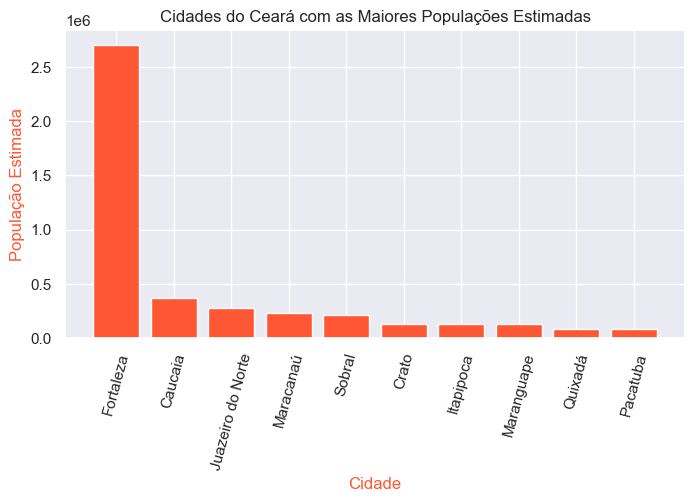

In [59]:
# Ordenar o dataset pelo População Estimada em ordem decrescente
df_sorted = df.sort_values('populacao_estimada', ascending=False)

# Selecionar as N cidades com os maiores PIBs
n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(top_cidades['cidade'], top_cidades['populacao_estimada'], color = '#FF5733')

# Personalizar o gráfico
plt.title('Cidades do Ceará com as Maiores Populações Estimadas')
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('População Estimada', color = '#FF5733')
plt.xticks(rotation=75)

# Mostrar o gráfico
plt.show()

## Densidade Demográfica hab/km² (2010)

In [151]:
# Medidas Resumo da Variável Densidade Demográfica
df['densidade_demografica'].describe()

count     182.000000
mean      115.034615
std       597.323469
min         6.660000
25%        22.460000
50%        37.450000
75%        68.992500
max      7786.440000
Name: densidade_demografica, dtype: float64

In [152]:
# Boxplot da variável 'densidade_demografica'

px.box(df, x = 'densidade_demografica', points = 'all')

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



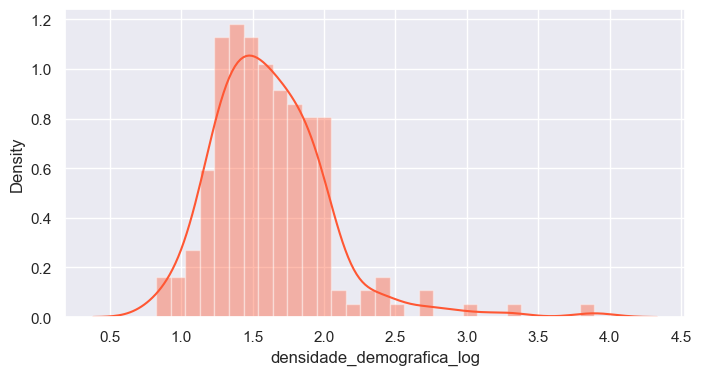

In [214]:
# Analisando a distribuição da variável densidade_demografica

# Converter as variáveis para escala logarítmica
df['densidade_demografica_log'] = np.log10(df['densidade_demografica'])

sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(df['densidade_demografica_log'], bins=30, color = '#FF5733')
plt.show()

In [154]:
# Padronizando a variável densidade_demografica
z_dens_dem = stats.zscore(df['densidade_demografica'])

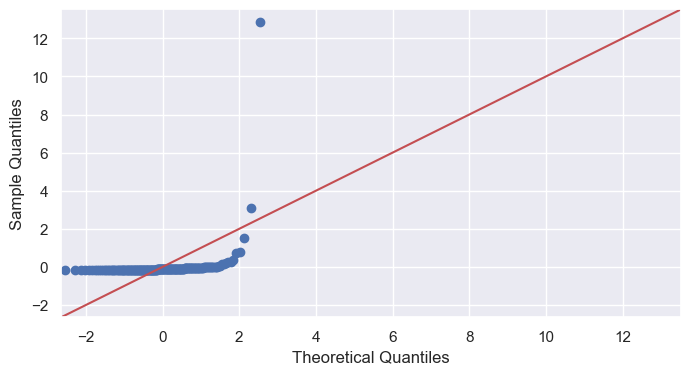

In [155]:
# Plotando o Qqplot da variável 'densidade_demografica'
sns.set(rc={'figure.figsize':(8,4)})
sm.qqplot(z_dens_dem, line ='45') 
py.show() 

### *Best Fit*

In [37]:
y_std = scipy.stats.zscore(df['densidade_demografica'])
y_std = y_std.to_numpy()
y_std

array([-9.45886978e-02, -2.77239618e-02, -7.84390929e-02, -1.55208472e-01,
       -1.81934222e-01, -6.26588138e-02, -3.60841522e-02, -1.72600354e-01,
       -1.37262602e-01, -1.48040196e-01, -1.50239363e-01,  5.95376244e-02,
       -9.85673426e-02, -1.28197335e-01, -1.41929535e-01, -1.61537371e-01,
       -2.45007558e-02, -1.81078057e-01, -1.59354992e-01, -1.46562894e-01,
       -1.24034027e-01, -1.66204305e-01, -3.00406411e-02, -5.94356078e-02,
       -1.42382799e-01, -1.29725000e-01, -1.18429574e-02, -1.42130986e-01,
       -1.31621991e-01, -1.62040997e-01, -7.87580560e-02, -1.03335001e-01,
       -1.52018841e-01, -1.54268370e-01, -6.44047170e-02, -1.53412206e-01,
       -1.22053098e-01, -1.52421742e-01, -1.63753325e-01, -1.16059950e-01,
       -6.05100098e-02, -1.28482723e-01, -1.71979216e-01,  2.51603767e-01,
       -1.36389650e-01, -1.04224741e-01, -7.90602316e-02, -1.66657568e-01,
       -1.45606004e-01, -1.52169929e-01, -1.98506097e-02, -1.52002054e-01,
       -7.87412685e-02, -

In [156]:
check_distribution(dist_names, y_std)

C:\Users\victo\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\victo\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.




Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value  D<p
0          beta   0.04906  0.75446  yes
1         expon   0.04988  0.73643  yes
5      pearson3   0.05024  0.72833  yes
2         gamma   0.05152  0.69961  yes
9   weibull_min   0.05180  0.69325  yes
3       lognorm   0.06551  0.39838  yes
10  weibull_max   0.09661  0.06254   no
6             t   0.15006  0.00048   no
4          norm   0.16534  0.00004   no
7        triang   0.37192  0.00000   no
8       uniform   0.56106  0.00000   no


### *Municípios do Ceará com as Maiores Densidades Demográficas*

In [157]:
# Ordenar o DataFrame em ordem decrescente
df_sorted = df.sort_values('densidade_demografica', ascending=False)

# Selecionar as 20 primeiras linhas (20 cidades com maiores áreas territoriais)
top_20_cidades = df_sorted.head(20)

# Criar o DataFrame a partir da lista
df_top_20_cidades = pd.DataFrame(top_20_cidades, columns=['cidade', 'densidade_demografica'])
display(df_top_20_cidades)

,cidade,densidade_demografica
58,Fortaleza,7786.44
101,Maracanaú,1960.25
96,Juazeiro do Norte,1004.45
55,Eusébio,582.66
125,Pacatuba,547.74
70,Horizonte,344.96
43,Caucaia,264.91
138,Pindoretama,256.06
124,Pacajus,243.00
177,Uruburetama,203.61


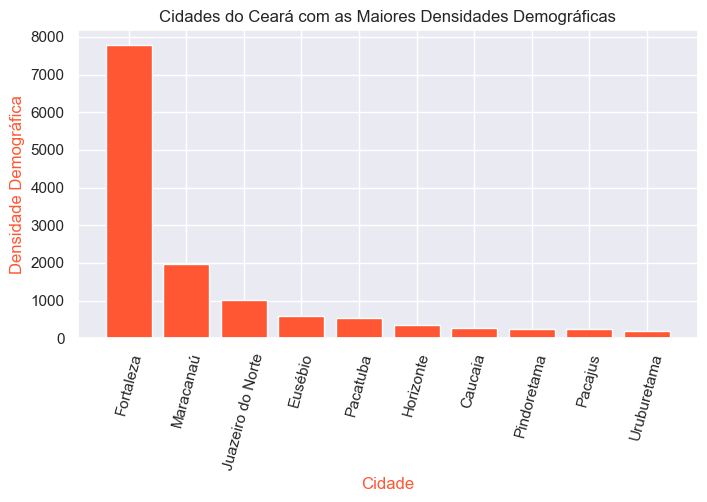

In [45]:
# Ordenar o dataset pelo População Estimada em ordem decrescente
df_sorted = df.sort_values('densidade_demografica', ascending=False)

# Selecionar as N cidades com os maiores PIBs
n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(top_cidades['cidade'], top_cidades['densidade_demografica'], color = '#FF5733')

# Personalizar o gráfico
plt.title('Cidades do Ceará com as Maiores Densidades Demográficas')
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('Densidade Demográfica', color = '#FF5733')
plt.xticks(rotation=75)

# Mostrar o gráfico
plt.show()

## Escolarização % (2010)

In [158]:
# Medidas Resumo da Variável Escolarização
df['escolarizacao'].describe()

count    182.000000
mean      97.273626
std        1.201365
min       91.700000
25%       96.700000
50%       97.500000
75%       98.000000
max       99.500000
Name: escolarizacao, dtype: float64

In [159]:
#  Boxplot da variável escolarização

px.box(df, x = 'escolarizacao', points = 'all')

In [160]:
# Criar o gráfico de violino
fig = px.violin(df, x='escolarizacao', orientation='h')

# Definir o título do gráfico
fig.update_layout(title_text='Gráfico de Violino - Escolarização')

# Exibir o gráfico
fig.show()

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



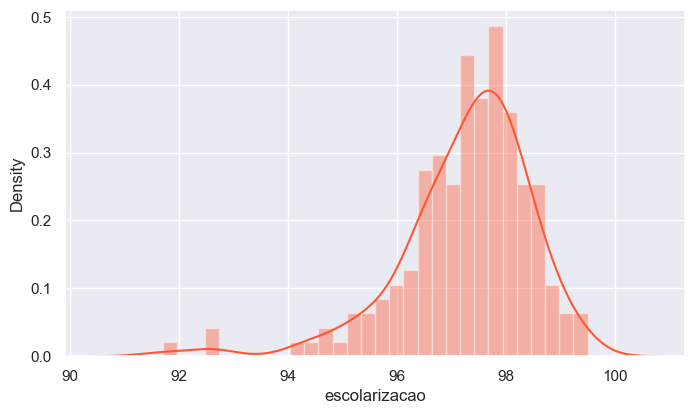

In [161]:
# Analisando a distribuição da variável escolarizacao

sns.set(rc={'figure.figsize':(8,4.5)})
sns.distplot(df['escolarizacao'], bins=30, color = '#FF5733')
plt.show()

In [42]:
# Padronizando a variável escolarizacao
z_esc = stats.zscore(df['escolarizacao'])

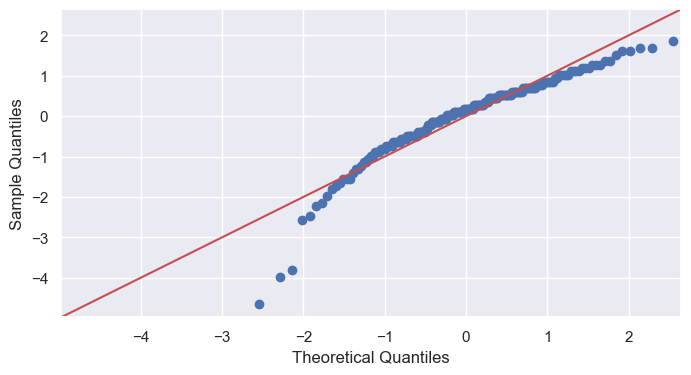

In [43]:
# Plotando o Qqplot da variável 'escolarizacao'
sns.set(rc={'figure.figsize':(8,4)})
sm.qqplot(z_esc, line ='45') 
py.show() 

### *Best Fit*

In [162]:
y_std = scipy.stats.zscore(df['escolarizacao'])
y_std = y_std.to_numpy()
y_std

array([-0.47879593, -0.39532767, -0.39532767, -0.06145465,  0.18895012,
        0.35588663, -1.31347848, -0.64573244, -0.22839116, -1.31347848,
        1.10710093, -0.64573244,  1.02363267, -0.64573244,  1.35750569,
       -0.81266895, -0.22839116,  0.27241837, -0.56226418,  0.52282314,
        0.52282314,  0.60629139,  0.85669616,  0.43935488, -0.14492291,
        0.52282314, -1.14654197,  0.77322791,  1.35750569,  0.27241837,
       -3.98446266,  0.43935488,  0.85669616,  0.18895012, -0.81266895,
        0.02201361, -0.97960546,  0.52282314, -0.14492291, -0.14492291,
       -0.47879593, -2.48203406,  1.19056918, -0.81266895,  0.18895012,
        0.10548186,  0.10548186, -0.06145465,  0.18895012,  0.18895012,
        0.43935488,  0.10548186,  1.02363267,  1.69137872,  0.60629139,
        0.85669616,  1.69137872, -0.72920069, -0.97960546,  0.18895012,
        0.43935488, -0.89613721, -2.14816104,  1.27403744,  1.52444221,
        0.52282314, -2.56550232,  0.35588663,  0.27241837,  0.60

In [163]:
check_distribution(dist_names, y_std)

C:\Users\victo\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\victo\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.




Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value  D<p
6             t   0.05788  0.55593  yes
5      pearson3   0.06230  0.46153  yes
0          beta   0.06500  0.40816  yes
4          norm   0.05844  0.27756  yes
10  weibull_max   0.08322  0.15192  yes
3       lognorm   0.10557  0.03208   no
2         gamma   0.11409  0.01610   no
1         expon   0.43051  0.00000   no
7        triang   0.26768  0.00000   no
8       uniform   0.45055  0.00000   no
9   weibull_min   0.72928  0.00000   no


### *Municípios do Ceará com as Maiores Taxas de Escolarização*

In [114]:
# Ordenar o DataFrame em ordem decrescente
df_sorted = df.sort_values('escolarizacao', ascending=False)

# Selecionar as 20 primeiras linhas (20 cidades com maiores áreas territoriais)
top_20_cidades = df_sorted.head(20)

# Criar o DataFrame a partir da lista
df_top_20_cidades = pd.DataFrame(top_20_cidades, columns=['cidade', 'escolarizacao', 'prefeito'])
display(df_top_20_cidades)

,cidade,escolarizacao,prefeito
83,Itaiçaba,99.5,FRANK GOMES FREITAS
53,Deputado Irapuan Pinheiro,99.3,FRANCISCO GILDECARLOS PINHEIRO
56,Farias Brito,99.3,FRANCISCO AUSTRAGEZIO SALES
113,Monsenhor Tabosa,99.2,FRANCISCO SALOMÃO DE ARAÚJO SOUSA
164,São João do Jaguaribe,99.2,RAIMUNDO CESAR MORAIS MAIA
64,Graça,99.1,MARIA IRALDICE DE ALCÂNTARA
28,Bela Cruz,98.9,JOSE OTACILIO DE MORAIS NETO
14,Ararendá,98.9,ALEXANDRE FELIX DUTRA
63,Granjeiro,98.8,FRANCISCO CLEMENTINO DE ALMEIDA
141,Poranga,98.8,CARLOS ANTONIO RODRIGUES PEREIRA


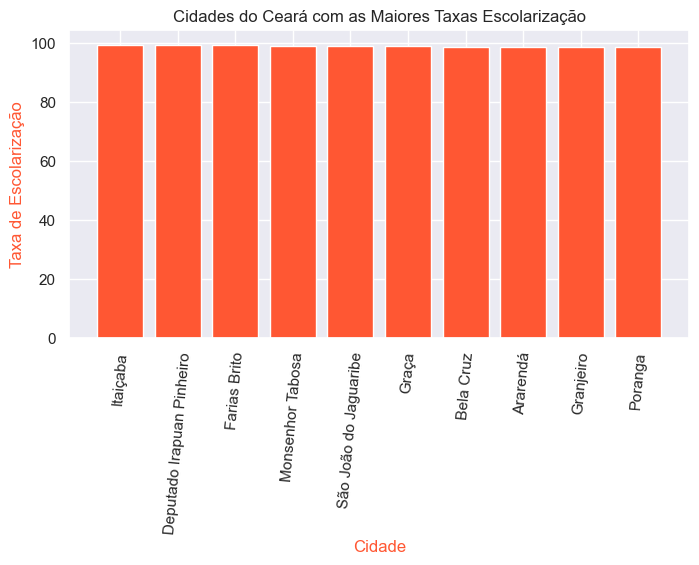

In [164]:
# Ordenar o dataset pela Escolarizaçaõ em ordem decrescente
df_sorted = df.sort_values('escolarizacao', ascending=False)

# Selecionar as N cidades com os maiores PIBs
n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(top_cidades['cidade'], top_cidades['escolarizacao'], color = '#FF5733')

# Personalizar o gráfico
plt.title('Cidades do Ceará com as Maiores Taxas Escolarização')
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('Taxa de Escolarização', color = '#FF5733')
plt.xticks(rotation=85)

# Mostrar o gráfico
plt.show()

## IDHM (Índice de Desenvolvimento Humano Municipal) (2010)

In [165]:
# Medidas Resumo da Variável IDHM (Índice de Desenvolvimento Humano Municipal)
df['idhm'].describe()

count    182.000000
mean       0.616247
std        0.031517
min        0.540000
25%        0.598250
50%        0.612000
75%        0.632000
max        0.754000
Name: idhm, dtype: float64

In [166]:
# Boxplot da variável idhm
px.box(df, x = 'idhm', points = 'all')

In [167]:
# Criar o gráfico de violino
fig = px.violin(df, x='idhm', orientation='h')

# Definir o título do gráfico
fig.update_layout(title_text='Gráfico de Violino - IDHM')

# Exibir o gráfico
fig.show()

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



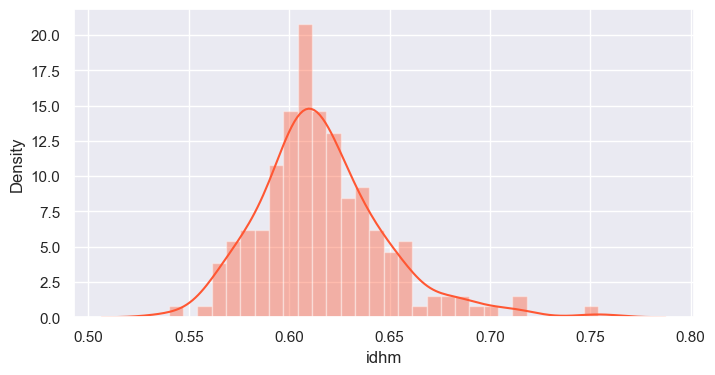

In [168]:
# Analisando a distribuição das variável idhm

sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(df['idhm'], bins=30, color = '#FF5733')
plt.show()

In [50]:
# Padronizando a variável 'idhm'
z_idhm = stats.zscore(df['idhm'])

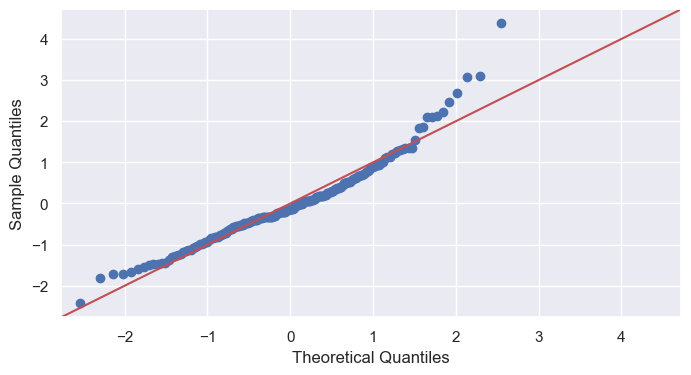

In [51]:
# Plotando o Qqplot da variável populacao_estimada
sm.qqplot(z_idhm, line ='45') 
sns.set(rc={'figure.figsize':(8,4)})
py.show() 

### *Best Fit*

In [169]:
y_std = scipy.stats.zscore(df['idhm'])
y_std = y_std.to_numpy()
y_std

array([ 0.37392563, -0.32602679, -0.48510688, -0.67600299, -1.50321948,
       -0.5169229 , -0.45329086, -0.48510688, -0.32602679, -0.54873892,
        0.05576544,  0.78753387,  1.23295813, -0.03968262, -0.83508309,
       -1.66229957,  0.18302951,  0.05576544, -0.5169229 , -0.3578428 ,
        0.34210961, -0.32602679,  2.12380666, -0.0078666 , -0.54873892,
       -1.43958744,  0.08758146,  0.69208581,  0.21484553, -0.58055494,
        0.97842998,  0.11939748,  0.43755766, -0.13513067, -0.16694669,
       -0.77145105, -1.21687531, -0.64418697, -0.61237095, -0.73963503,
        0.94661396,  0.05576544, -0.23057873,  2.09199064,  0.34210961,
       -0.96234716, -0.38965882, -0.99416318, -0.19876271,  0.88298193,
        3.07828722, -0.83508309,  0.5011897 , -0.23057873, -0.19876271,
        2.696495  ,  0.53300572,  0.88298193,  4.38274399,  0.24666155,
       -0.38965882, -1.5350355 , -1.82137967, -0.99416318, -1.47140346,
        0.53300572,  0.02394942, -0.23057873,  0.6602698 , -0.61

In [170]:
check_distribution(dist_names, y_std)

C:\Users\victo\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\victo\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.




Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value  D<p
6             t   0.03869  0.93824  yes
2         gamma   0.05696  0.57622  yes
5      pearson3   0.05697  0.57610  yes
3       lognorm   0.05773  0.55920  yes
4          norm   0.08673  0.06099   no
0          beta   0.99451  0.00000   no
1         expon   0.31612  0.00000   no
7        triang   0.22417  0.00000   no
8       uniform   0.37799  0.00000   no
9   weibull_min   0.44783  0.00000   no
10  weibull_max   0.73509  0.00000   no


### *Municípios do Ceará com os Maiores IDHM*

In [172]:
# Ordenar o DataFrame em ordem decrescente
df_sorted = df.sort_values('idhm', ascending=False)

# Selecionar as 20 primeiras linhas (20 cidades com maiores áreas territoriais)
top_20_cidades = df_sorted.head(20)

# Criar o DataFrame a partir da lista
df_top_20_cidades = pd.DataFrame(top_20_cidades, columns=['cidade', 'idhm', 'prefeito'])
display(df_top_20_cidades)

,cidade,idhm,prefeito
58,Fortaleza,0.754,JOSÉ SARTO NOGUEIRA MOREIRA
160,Sobral,0.714,IVO FERREIRA GOMES
50,Crato,0.713,JOSÉ AILTON DE SOUSA BRASIL
55,Eusébio,0.701,ACILON GONÇALVES PINTO JUNIOR
96,Juazeiro do Norte,0.694,GLÊDSON LIMA BEZERRA
101,Maracanaú,0.686,ROBERTO SOARES PESSOA
22,Barbalha,0.683,GUILHERME SAMPAIO SARAIVA
43,Caucaia,0.682,VITOR PEREIRA VALIM
99,Limoeiro do Norte,0.682,JOSÉ MARIA DE OLIVEIRA LUCENA
125,Pacatuba,0.675,CARLOMANO GOMES MARQUES


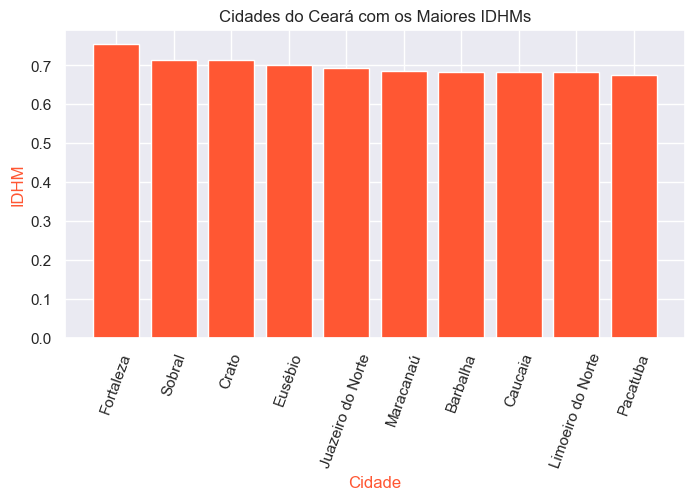

In [171]:
# Ordenar o dataset pelo IDHM em ordem decrescente
df_sorted = df.sort_values('idhm', ascending=False)

# Selecionar as N cidades com os maiores PIBs
n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(top_cidades['cidade'], top_cidades['idhm'], color = '#FF5733')

# Personalizar o gráfico
plt.title("Cidades do Ceará com os Maiores IDHMs")
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('IDHM', color = '#FF5733')
plt.xticks(rotation=70)

# Mostrar o gráfico
plt.show()

## Mortalidade Infantil (óbitos por mil nascidos vivos) (2020)

In [173]:
# Medidas Resumo da Variável IDHM (Índice de Desenvolvimento Humano Municipal)
df['mortalidade_infantil'].describe()

count    169.000000
mean      12.854793
std        6.657863
min        2.610000
25%        8.140000
50%       11.110000
75%       16.610000
max       32.610000
Name: mortalidade_infantil, dtype: float64

In [174]:
# Calcular a mediana da variável "mortalidade_infantil"
mediana = df['mortalidade_infantil'].median()

# Substituir os valores faltantes pela mediana
df['mortalidade_infantil'].fillna(mediana, inplace=True)

In [175]:
px.box(df, x = 'mortalidade_infantil', points = 'all')

In [176]:
# Criar o gráfico de violino
fig = px.violin(df, x='mortalidade_infantil', orientation='h')

# Definir o título do gráfico
fig.update_layout(title_text='Gráfico de Violino - Mortalidade Infantil')

# Exibir o gráfico
fig.show()

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



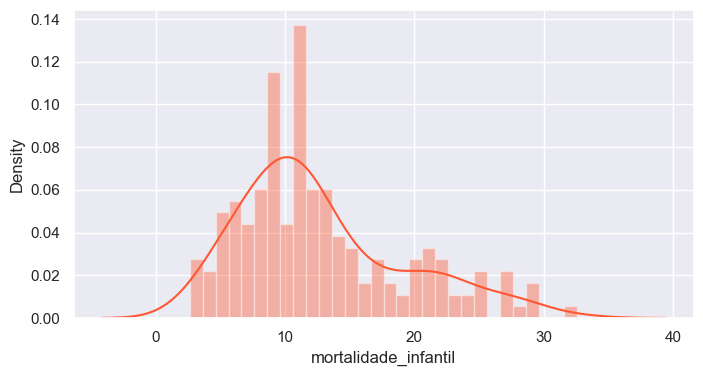

In [177]:
# Analisando a distribuição das variável mortalidade_infantil

sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(df['mortalidade_infantil'], bins=30, color = '#FF5733')
plt.show()

In [178]:
# Padronizando a variável 'mortalidade_infantil'
z_mort_inf = stats.zscore(df['mortalidade_infantil'])

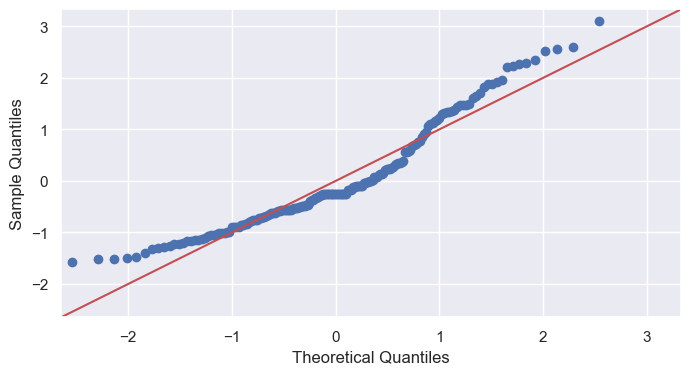

In [179]:
# Plotando o Qqplot da variável populacao_estimada
sns.set(rc={'figure.figsize':(8,4)})
sm.qqplot(z_mort_inf, line ='45') 
py.show() 

### *Best Fit*

In [180]:
y_std = scipy.stats.zscore(df['mortalidade_infantil'])
y_std = y_std.to_numpy()
y_std

array([ 1.11343644, -1.15091515, -1.06202532,  1.16178004,  0.36644993,
       -0.25265997, -0.51465107, -0.09515342, -0.62537349, -0.25265997,
       -0.25265997,  0.23389491, -0.53024578, -0.62849244, -0.88736459,
       -0.1123076 ,  0.12161302,  3.10020223, -0.25889786, -0.56299466,
       -0.25265997, -0.71738227, -1.00900331,  1.95711014,  0.15124296,
       -1.22109134,  0.5707406 ,  0.70797403,  1.65145386, -0.29476569,
       -0.3898934 , -0.01562041,  1.32240553, -0.04213142, -0.10606972,
        0.95748936, -1.19769927, -0.75792851,  0.78282863, -0.59886249,
       -1.52050973, -0.82966417, -0.48502112,  0.02336636, -0.25265997,
       -1.04643061, -0.25265997,  0.22609756, -1.50491502,  0.08106678,
       -0.42576123,  1.06041443, -0.56767307, -0.25265997,  2.34697784,
       -0.55519731,  2.52631698, -0.25265997, -0.11074813,  0.5707406 ,
        1.43000901, -0.54116207, -0.99184913,  2.28771795,  1.47991208,
        1.21948045, -1.47996349, -0.5661136 , -0.25265997, -0.03

In [181]:
check_distribution(dist_names, y_std)

C:\Users\victo\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning:

invalid value encountered in sqrt




Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value  D<p
3       lognorm   0.06605  0.38831  yes
5      pearson3   0.07017  0.31679  yes
2         gamma   0.07017  0.31672  yes
0          beta   0.07782  0.20913  yes
6             t   0.12120  0.00869   no
7        triang   0.13384  0.00265   no
4          norm   0.14369  0.00048   no
1         expon   0.20002  0.00000   no
8       uniform   0.32725  0.00000   no
9   weibull_min   0.25365  0.00000   no
10  weibull_max   0.60520  0.00000   no


### *Municípios do Ceará com Maiores Taxas de Mortalidade Infantil*

In [182]:
# Ordenar o DataFrame em ordem decrescente
df_sorted = df.sort_values('mortalidade_infantil', ascending=False)

# Selecionar as 20 primeiras linhas (20 cidades com maiores áreas territoriais)
top_20_cidades = df_sorted.head(20)

# Criar o DataFrame a partir da lista
df_top_20_cidades = pd.DataFrame(top_20_cidades, columns=['cidade', 'mortalidade_infantil', 'prefeito'])
display(df_top_20_cidades)

,cidade,mortalidade_infantil,prefeito
17,Arneiroz,32.61,ANTÔNIO MONTEIRO PEDROSA FILHO
170,Tejuçuoca,29.41,JOSE ANTUNIZIO DE BRITO
90,Jaguaribara,29.20,JOACY ALVES DOS SANTOS JUNIOR
56,Farias Brito,28.93,FRANCISCO AUSTRAGEZIO SALES
54,Ereré,27.78,FRANCISCO OTONI DE QUEIROZ MOURA
63,Granjeiro,27.40,FRANCISCO CLEMENTINO DE ALMEIDA
156,Santana do Acaraú,27.33,FRANCISCO DAS CHAGAS MENDES
123,Orós,27.03,JOSÉ RUBENS LIMA VERDE
147,Quixelô,26.88,JOSE ADIL VIEIRA JUNIOR
23,Barreira,25.28,ANTONIO ALAILSON OLIVEIRA SALDANHA


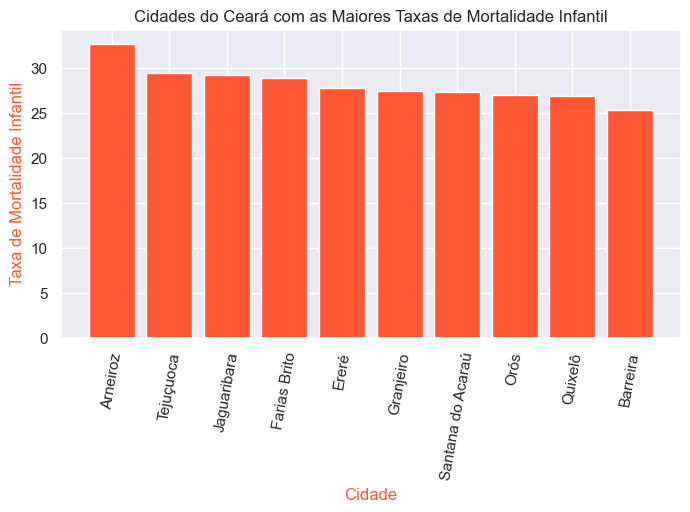

In [56]:
# Ordenar o dataset pela Mortalidade Infantil em ordem decrescente
df_sorted = df.sort_values('mortalidade_infantil', ascending=False)

# Selecionar as N cidades com os maiores PIBs
n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(top_cidades['cidade'], top_cidades['mortalidade_infantil'], color = '#FF5733')

# Personalizar o gráfico
plt.title('Cidades do Ceará com as Maiores Taxas de Mortalidade Infantil')
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('Taxa de Mortalidade Infantil', color = '#FF5733')
plt.xticks(rotation=80)

# Mostrar o gráfico
plt.show()

## Receitas Realizadas (*1000) (2017)

In [183]:
# Medidas Resumo da Variável 'receitas_realizadas'
df['receitas_realizadas'].describe()

count    1.820000e+02
mean     1.211275e+05
std      5.091373e+05
min      1.151000e+01
25%      3.810370e+04
50%      5.237593e+04
75%      8.836731e+04
max      6.810527e+06
Name: receitas_realizadas, dtype: float64

In [184]:
px.box(df, x = 'receitas_realizadas', points = 'all')

In [185]:
# Criar o gráfico de violino
fig = px.violin(df, x='receitas_realizadas', orientation='h')

# Definir o título do gráfico
fig.update_layout(title_text='Gráfico de Violino - Receitas Realizadas')

# Exibir o gráfico
fig.show()

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



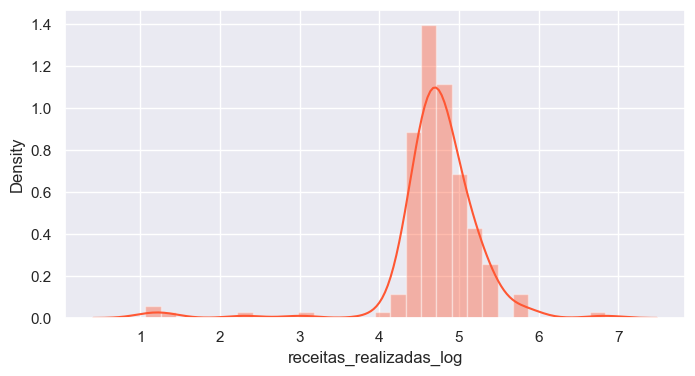

In [215]:
# Analisando a distribuição das variável receitas_realizadas

# Converter as variáveis para escala logarítmica
df['receitas_realizadas_log'] = np.log10(df['receitas_realizadas'])

sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(df['receitas_realizadas_log'], bins=30, color = '#FF5733')
plt.show()

In [187]:
# Padronizando a variável receitas_realizadas
z_rec = stats.zscore(df['receitas_realizadas'])

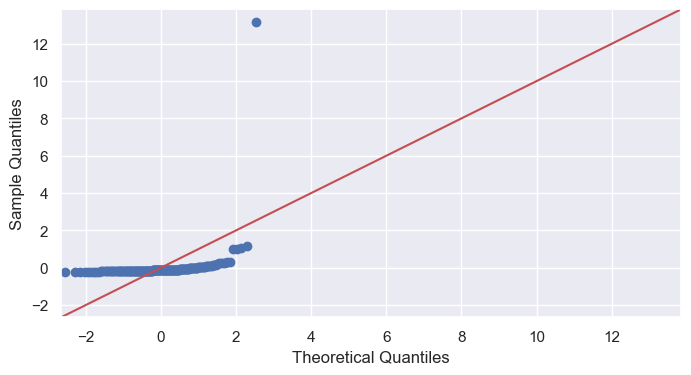

In [188]:
# Plotando o Qqplot da variável receitas_realizadas
sns.set(rc={'figure.figsize':(8,4)})
sm.qqplot(z_rec, line ='45') 
py.show() 

In [189]:
### *Best Fit*

In [190]:
y_std = scipy.stats.zscore(df['receitas_realizadas'])
y_std = y_std.to_numpy()
y_std

array([-1.81360906e-01, -1.62219921e-01,  2.27063513e-02,  6.30664850e-02,
       -1.64126243e-01, -1.83322907e-01, -1.76153344e-01, -1.58394690e-01,
       -3.25592450e-02, -1.97023276e-01, -1.53576405e-01,  2.42013398e-01,
        2.09624010e-01, -1.06664824e-01, -1.79018628e-01, -1.02238474e-01,
       -1.41813299e-01, -2.38541038e-01, -1.35686423e-01, -1.35129618e-01,
       -1.92022475e-01, -1.47829863e-01,  2.41556941e-01, -1.40948914e-01,
       -1.57141658e-01, -1.60373038e-01, -9.23842521e-02, -2.69537896e-03,
       -1.30486975e-01, -3.42818703e-02,  9.74396767e-02,  1.23935458e-01,
       -9.59261668e-02,  1.73064409e-01, -1.51096261e-01, -1.55130714e-01,
       -1.21330182e-01, -1.37803130e-01, -1.53643684e-01, -1.51114833e-01,
        7.17864185e-02, -1.43213375e-01, -1.78886729e-01,  1.00194974e+00,
       -9.29924807e-02, -1.81825339e-01, -1.32543396e-01, -1.60799736e-01,
       -1.36272258e-01,  3.76493334e-02,  2.79436418e-01, -1.51055314e-01,
       -1.06935515e-01, -

In [191]:
check_distribution(dist_names, y_std)

C:\Users\victo\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\victo\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.




Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value D<p
3       lognorm   0.10993  0.02269  no
6             t   0.14834  0.00058  no
0          beta   0.21916  0.00000  no
1         expon   0.23716  0.00000  no
2         gamma   0.84474  0.00000  no
4          norm   0.36888  0.00000  no
5      pearson3   0.19468  0.00000  no
7        triang   0.89214  0.00000  no
8       uniform   0.93126  0.00000  no
9   weibull_min   0.22482  0.00000  no
10  weibull_max   0.86926  0.00000  no


In [193]:
# Ordenar o DataFrame em ordem decrescente
df_sorted = df.sort_values('receitas_realizadas', ascending=False)

# Selecionar as 20 primeiras linhas (20 cidades com maiores áreas territoriais)
top_20_cidades = df_sorted.head(20)

# Criar o DataFrame a partir da lista
df_top_20_cidades = pd.DataFrame(top_20_cidades, columns=['cidade', 'receitas_realizadas', 'prefeito'])
display(df_top_20_cidades)

,cidade,receitas_realizadas,prefeito
58,Fortaleza,6810527.07,JOSÉ SARTO NOGUEIRA MOREIRA
101,Maracanaú,724429.98,ROBERTO SOARES PESSOA
96,Juazeiro do Norte,672950.29,GLÊDSON LIMA BEZERRA
43,Caucaia,629854.17,VITOR PEREIRA VALIM
160,Sobral,620503.26,IVO FERREIRA GOMES
55,Eusébio,281098.32,ACILON GONÇALVES PINTO JUNIOR
85,Itapipoca,268626.66,FELIPE SOUZA PINHEIRO
50,Crato,263007.66,JOSÉ AILTON DE SOUSA BRASIL
163,São Gonçalo do Amarante,252306.83,MARCELO FERREIRA TELES
11,Aquiraz,244006.62,BRUNO BARROS GONÇALVES


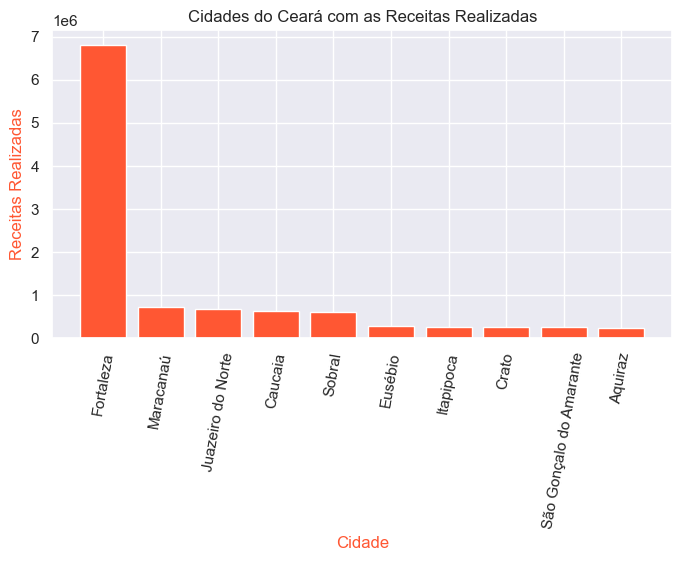

In [192]:
# Ordenar o dataset pelas Receitas Realizadas em ordem decrescente
df_sorted = df.sort_values('receitas_realizadas', ascending=False)

n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(top_cidades['cidade'], top_cidades['receitas_realizadas'], color = '#FF5733')

# Personalizar o gráfico
plt.title('Cidades do Ceará com as Receitas Realizadas')
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('Receitas Realizadas', color = '#FF5733')
plt.xticks(rotation=80)

# Mostrar o gráfico
plt.show()

## Despesas Empenhadas (*1000) (2017)

In [95]:
# Medidas Resumo da Variável receitas_realizadas
df['despesas_empenhadas'].describe()

count    1.820000e+02
mean     1.121160e+05
std      4.865141e+05
min      1.680449e+04
25%      3.381410e+04
50%      4.754151e+04
75%      8.215374e+04
max      6.525658e+06
Name: despesas_empenhadas, dtype: float64

In [96]:
px.box(df, x = 'despesas_empenhadas', points = 'all')

In [97]:
# Criar o gráfico de violino
fig = px.violin(df, x='despesas_empenhadas', orientation='h')

# Definir o título do gráfico
fig.update_layout(title_text='Gráfico de Violino - Despesas Empenhadas')

# Exibir o gráfico
fig.show()

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



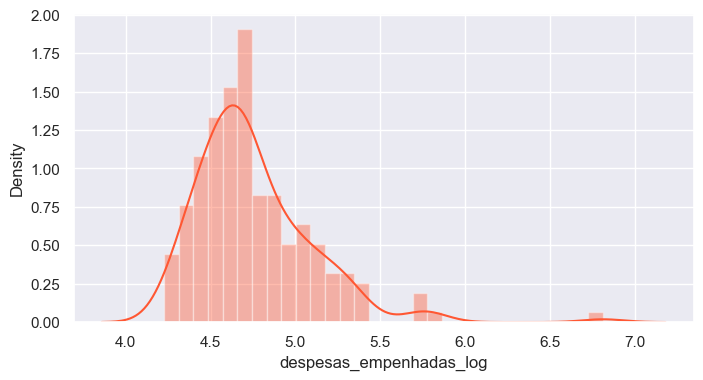

In [216]:
# Analisando a distribuição das variável despesas_empenhadas

# Converter as variáveis para escala logarítmica
df['despesas_empenhadas_log'] = np.log10(df['despesas_empenhadas'])

sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(df['despesas_empenhadas_log'], bins=30, color = '#FF5733')
plt.show()

In [105]:
# Padronizando a variável despesas_empenhadas
z_desp = stats.zscore(df['despesas_empenhadas'])

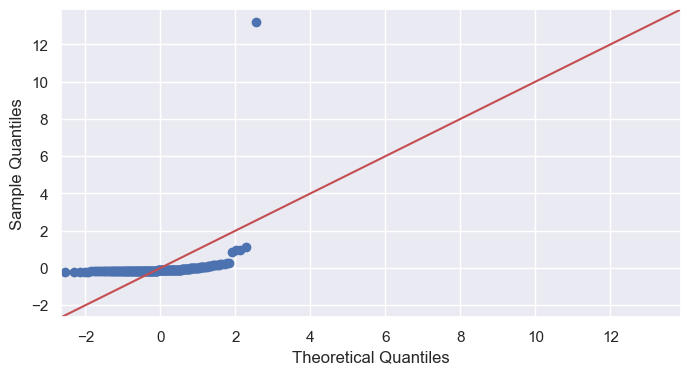

In [106]:
# Plotando o Qqplot da variável despesas_empenhadas
sns.set(rc={'figure.figsize':(8,4)})
sm.qqplot(z_desp, line ='45') 
py.show() 

### *Best Fit*

In [195]:
y_std = scipy.stats.zscore(df['despesas_empenhadas'])
y_std = y_std.to_numpy()
y_std

array([-1.75788105e-01, -1.55233552e-01, -4.56890236e-03,  2.72893901e-02,
       -1.61465397e-01, -1.71330091e-01, -1.81545174e-01, -1.57018885e-01,
       -2.30343771e-02, -1.90874000e-01, -1.55189094e-01,  1.75988566e-01,
        1.51502304e-01, -8.60763611e-02, -1.72869245e-01, -1.08093147e-01,
       -1.65882292e-01, -1.88899808e-01, -1.42655058e-01, -1.34695426e-01,
       -1.87043429e-01, -1.44119867e-01,  2.37307216e-01, -1.39187819e-01,
       -1.50041227e-01, -1.57014495e-01, -9.16928210e-02,  4.65307601e-03,
       -1.18105849e-01, -2.84765909e-02,  7.33893886e-02,  1.06363030e-01,
       -9.91337952e-02,  1.78937951e-01, -1.33409191e-01, -1.40271014e-01,
       -1.16811122e-01, -1.37038392e-01, -1.51660764e-01, -1.50097557e-01,
        7.18063333e-02, -1.48468848e-01, -1.71016308e-01,  9.38168359e-01,
       -1.24869193e-01, -1.68611880e-01, -1.33735609e-01, -1.63755846e-01,
       -1.33230967e-01,  5.73967293e-02,  2.35458133e-01, -1.42174366e-01,
       -1.20066087e-01, -

In [196]:
check_distribution(dist_names, y_std)

C:\Users\victo\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\victo\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.




Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value  D<p
3       lognorm   0.06692  0.37249  yes
0          beta   0.11762  0.01191   no
9   weibull_min   0.15237  0.00037   no
6             t   0.17784  0.00002   no
5      pearson3   0.17933  0.00001   no
1         expon   0.28880  0.00000   no
2         gamma   0.65170  0.00000   no
4          norm   0.37405  0.00000   no
7        triang   0.90207  0.00000   no
8       uniform   0.93645  0.00000   no
10  weibull_max   0.26013  0.00000   no


### *Municípios do Ceará com as Maiores Despesas Empenhadas* 

In [197]:
# Ordenar o DataFrame em ordem decrescente
df_sorted = df.sort_values('despesas_empenhadas', ascending=False)

# Selecionar as 20 primeiras linhas (20 cidades com maiores áreas territoriais)
top_20_cidades = df_sorted.head(20)

# Criar o DataFrame a partir da lista
df_top_20_cidades = pd.DataFrame(top_20_cidades, columns=['cidade', 'despesas_empenhadas', 'prefeito'])
display(df_top_20_cidades)

,cidade,despesas_empenhadas,prefeito
58,Fortaleza,6525657.82,JOSÉ SARTO NOGUEIRA MOREIRA
101,Maracanaú,657108.10,ROBERTO SOARES PESSOA
160,Sobral,574656.94,IVO FERREIRA GOMES
43,Caucaia,567292.53,VITOR PEREIRA VALIM
96,Juazeiro do Norte,522709.24,GLÊDSON LIMA BEZERRA
55,Eusébio,251597.09,ACILON GONÇALVES PINTO JUNIOR
85,Itapipoca,239926.55,FELIPE SOUZA PINHEIRO
22,Barbalha,227251.72,GUILHERME SAMPAIO SARAIVA
50,Crato,226354.59,JOSÉ AILTON DE SOUSA BRASIL
163,São Gonçalo do Amarante,219614.33,MARCELO FERREIRA TELES


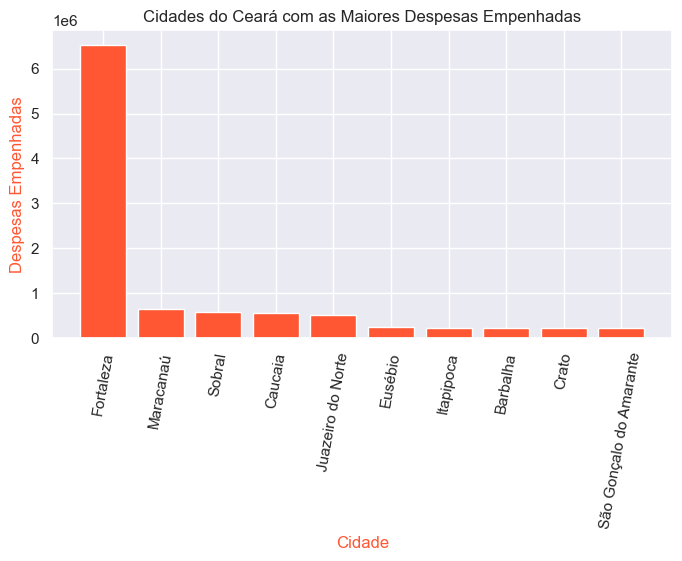

In [198]:
# Ordenar o dataset pelas Despesas Empenhadas em ordem decrescente
df_sorted = df.sort_values('despesas_empenhadas', ascending=False)

n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(top_cidades['cidade'], top_cidades['despesas_empenhadas'], color = '#FF5733')

# Personalizar o gráfico
plt.title('Cidades do Ceará com as Maiores Despesas Empenhadas')
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('Despesas Empenhadas', color = '#FF5733')
plt.xticks(rotation=80)

# Mostrar o gráfico
plt.show()

## PIB (Produto Interno Bruto R$) (2020)

In [199]:
# Medidas Resumo da Variável PIB
df['pib'].describe()

count      182.000000
mean     12420.318022
std       8040.799837
min       6695.210000
25%       8668.630000
50%      10361.770000
75%      13033.630000
max      83473.110000
Name: pib, dtype: float64

In [200]:
# Boxplot da variável pib
px.box(df, x = 'pib', points = 'all')

In [201]:
# Criar o gráfico de violino
fig = px.violin(df, x='pib', orientation='h')

# Definir o título do gráfico
fig.update_layout(title_text='Gráfico de Violino - PIB (R$)')

# Exibir o gráfico
fig.show()

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



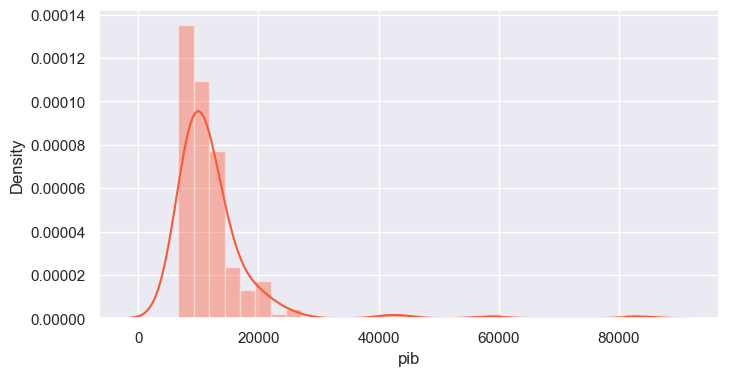

In [202]:
# Analisando a distribuição das variável pib

sns.set(rc={'figure.figsize':(8, 4)})
sns.distplot(df['pib'], bins=30, color = '#FF5733')
plt.show()

In [203]:
# Padronizando a variável pib
z_pib = stats.zscore(df['pib'])

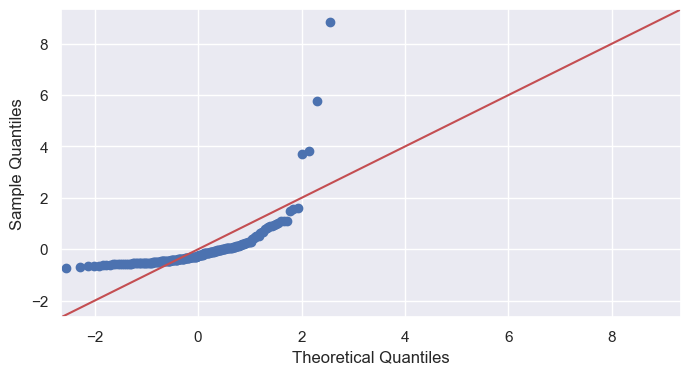

In [204]:
# Plotando o Qqplot da variável pib
sns.set(rc={'figure.figsize':(8,4)})
sm.qqplot(z_pib, line ='45') 
py.show() 

### *Best Fit*

In [205]:
y_std = scipy.stats.zscore(df['pib'])
y_std = y_std.to_numpy()
y_std

array([-4.06834829e-01, -2.62243687e-01,  1.04951445e-01, -3.72638425e-01,
       -4.71077328e-01, -5.91897723e-01, -4.81389500e-01, -8.67085459e-02,
       -2.80692136e-02, -3.91651531e-01, -5.95838522e-01,  3.70719801e+00,
        9.09540300e-01, -3.16091706e-01, -5.39134670e-01, -4.56202061e-01,
        1.09923585e-01, -4.92969961e-01, -1.02647580e-01, -4.70234297e-01,
       -2.72885090e-01, -1.20557013e-01,  8.89439733e-01, -4.15356182e-01,
       -3.09283852e-01, -5.30109493e-01, -1.00294324e-01,  6.87597268e-01,
       -5.32182154e-01, -3.91080364e-01,  2.21974456e-01, -1.07481293e-01,
       -1.45128391e-01,  5.72029334e-02, -2.25604237e-01, -5.69243120e-01,
       -4.03301828e-01, -3.69130366e-01, -4.54111941e-01, -4.74761227e-01,
        9.91113310e-02, -7.13971442e-01, -2.93795017e-01,  9.29453804e-01,
       -4.47115777e-01, -5.79859581e-01,  5.29008808e-01,  3.91600619e-02,
       -5.24436489e-01, -6.35176945e-02,  6.26552028e-02, -1.33727511e-01,
       -7.24692933e-02, -

In [206]:
check_distribution(dist_names, y_std)

C:\Users\victo\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\victo\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.




Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value  D<p
3       lognorm   0.04436  0.85038  yes
5      pearson3   0.10384  0.03667   no
9   weibull_min   0.11854  0.01099   no
1         expon   0.12304  0.00736   no
10  weibull_max   0.12312  0.00731   no
0          beta   0.12786  0.00471   no
6             t   0.15275  0.00036   no
2         gamma   0.69678  0.00000   no
4          norm   0.24005  0.00000   no
7        triang   0.65291  0.00000   no
8       uniform   0.77076  0.00000   no


### *Municípios do Ceará com os Maiores PIBs*

In [207]:
# Ordenar o DataFrame em ordem decrescente
df_sorted = df.sort_values('pib', ascending=False)

# Selecionar as 20 primeiras linhas (20 cidades com maiores áreas territoriais)
top_20_cidades = df_sorted.head(20)

# Criar o DataFrame a partir da lista
df_top_20_cidades = pd.DataFrame(top_20_cidades, columns=['cidade', 'pib', 'prefeito'])
display(df_top_20_cidades)

,cidade,pib,prefeito
163,São Gonçalo do Amarante,83473.11,MARCELO FERREIRA TELES
55,Eusébio,58604.18,ACILON GONÇALVES PINTO JUNIOR
101,Maracanaú,43116.46,ROBERTO SOARES PESSOA
11,Aquiraz,42147.15,BRUNO BARROS GONÇALVES
137,Pereiro,25214.91,RAIMUNDO ESTEVAM NETO
70,Horizonte,25074.33,MANOEL GOMES DE FARIAS NETO
58,Fortaleza,24253.93,JOSÉ SARTO NOGUEIRA MOREIRA
160,Sobral,21343.10,IVO FERREIRA GOMES
95,Jijoca de Jericoacoara,21191.38,LINDBERGH MARTINS
171,Tianguá,21137.06,LUIZ MENEZES DE LIMA


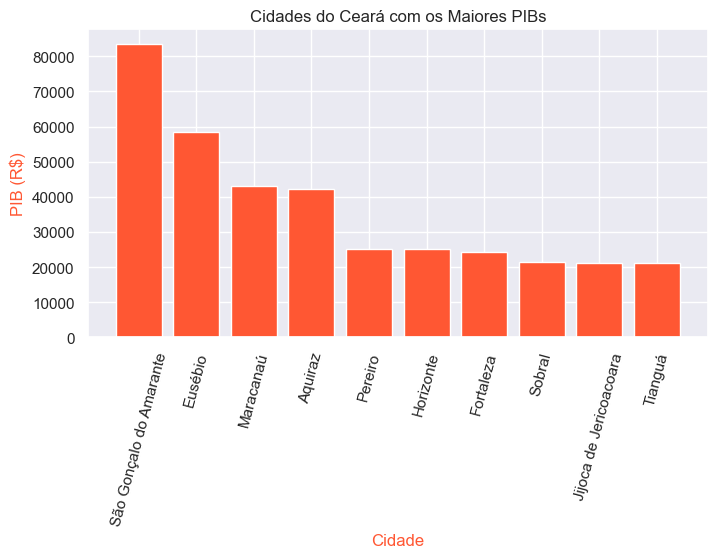

In [208]:
# Ordenar o dataset pelo PIB em ordem decrescente
df_sorted = df.sort_values('pib', ascending=False)

# Selecionar as N cidades com os maiores PIBs
n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(top_cidades['cidade'], top_cidades['pib'], color = '#FF5733')

# Personalizar o gráfico
plt.title('Cidades do Ceará com os Maiores PIBs')
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('PIB (R$)', color = '#FF5733')
plt.xticks(rotation=75)

# Mostrar o gráfico
plt.show()

# Correlação entre variáveis

In [209]:
# Medindo a correlação entre as variáveis
df[['receitas_realizadas', 'despesas_empenhadas']].corr()

,receitas_realizadas,despesas_empenhadas
receitas_realizadas,1.000000,0.999637
despesas_empenhadas,0.999637,1.000000


### Matriz de Correlação

In [210]:
# Lendo o dataset Cidades por meio do Pandas 
df = pd.read_csv('DF_Cidades.csv')

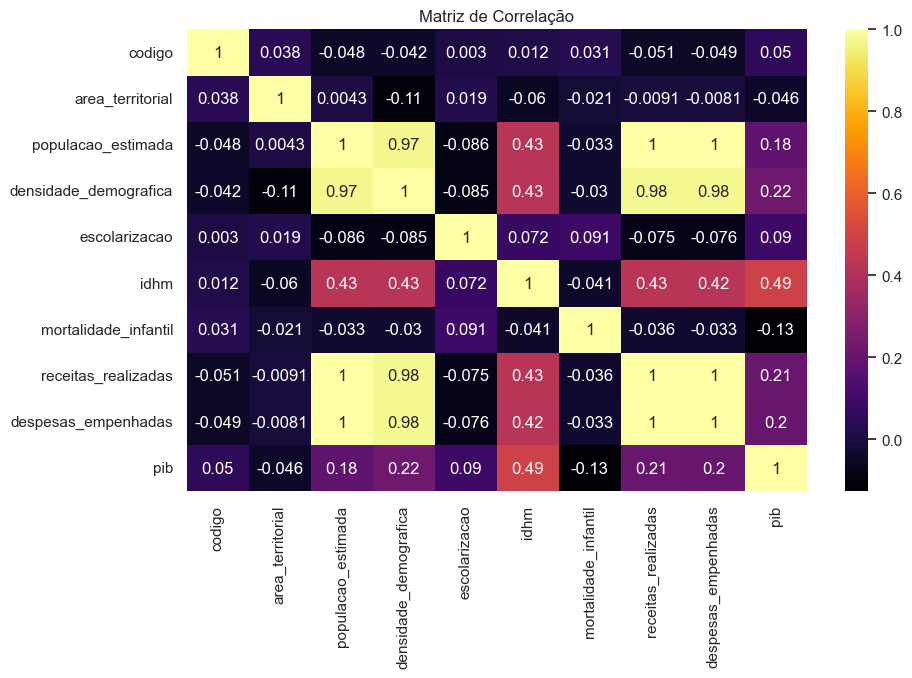

In [211]:
# Calcular a matriz de correlação
matriz_correlacao = df.corr()

# Criar o gráfico da matriz de correlação
plt.figure(figsize=(10,6))
sns.heatmap(matriz_correlacao, annot=True, cmap='inferno')

# Personalizar o gráfico
plt.title('Matriz de Correlação')
plt.show()

### Gráficos de Dispersão

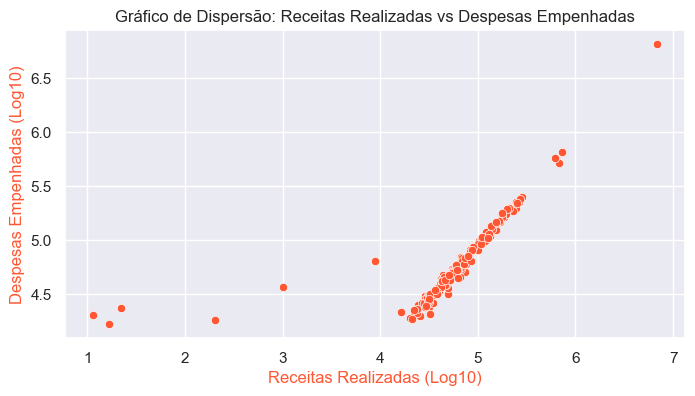

In [217]:
# Converter as variáveis para escala logarítmica
df['receitas_realizadas_log'] = np.log10(df['receitas_realizadas'])
df['receitas_empenhadas_log'] = np.log10(df['despesas_empenhadas'])

plt.figure(figsize=(8,4))  # Tamanho da figura
sns.scatterplot(data=df, x='receitas_realizadas_log', y='despesas_empenhadas_log', color = '#FF5733')

# Personalizar o gráfico de dispersão
plt.title('Gráfico de Dispersão: Receitas Realizadas vs Despesas Empenhadas')
plt.xlabel('Receitas Realizadas (Log10)', color = '#FF5733')
plt.ylabel('Despesas Empenhadas (Log10)', color = '#FF5733')

# Mostrar o gráfico de dispersão
plt.show()

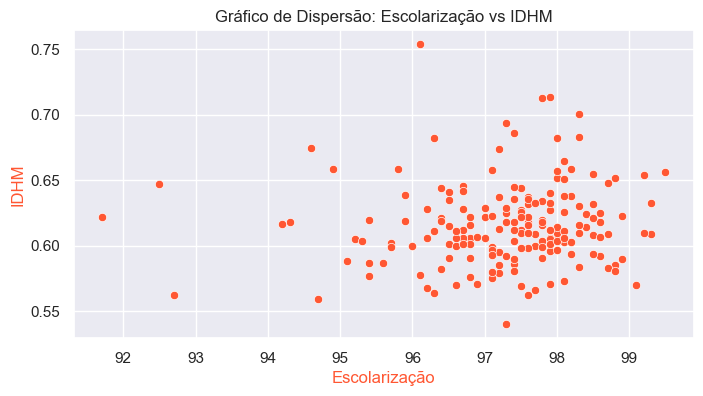

In [218]:
plt.figure(figsize=(8,4))  # Tamanho da figura
sns.scatterplot(data=df, x='escolarizacao', y='idhm', color = '#FF5733')

# Personalizar o gráfico de dispersão
plt.title('Gráfico de Dispersão: Escolarização vs IDHM')
plt.xlabel('Escolarização', color = '#FF5733')
plt.ylabel('IDHM', color = '#FF5733')

# Mostrar o gráfico de dispersão
plt.show()

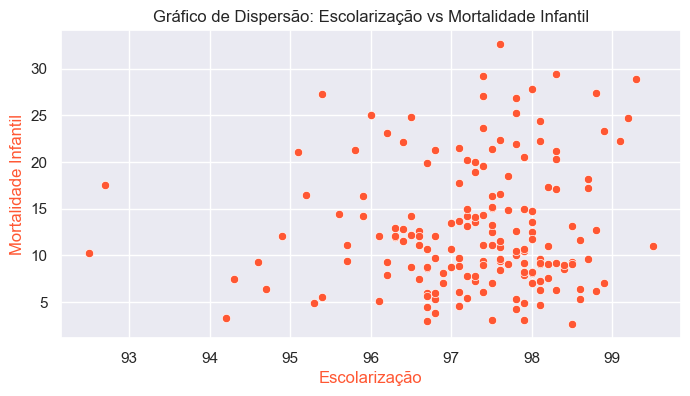

In [219]:
plt.figure(figsize=(8,4))  # Tamanho da figura
sns.scatterplot(data=df, x='escolarizacao', y='mortalidade_infantil', color = '#FF5733')

# Personalizar o gráfico de dispersão
plt.title('Gráfico de Dispersão: Escolarização vs Mortalidade Infantil')
plt.xlabel('Escolarização', color = '#FF5733')
plt.ylabel('Mortalidade Infantil', color = '#FF5733')

# Mostrar o gráfico de dispersão
plt.show()

# Mapa de Calor

In [220]:
# Bibliotecas que serão utilizadas

import folium
import branca.colormap
import numpy as np
from folium.plugins import HeatMap
from folium.plugins import MousePosition

In [221]:
# Dados de entrada
geojson_arquivo = "geojs-23-mun.json"

In [223]:
mapa_ce = folium.Map([-5.35352,-39.28711], zoom_start = 7, tiles = None)
MousePosition().add_to(mapa_ce) # localizar as coordenadas de interesse

#Adicionar o fundo branco
folium.TileLayer(tiles = branca.utilities.image_to_url([[1,1], [1,1]]),
                attr = "Romulo Freitas", name = "Imagem Fundo").add_to(mapa_ce)

#Adicionando a fronteira dos municipios
estilo = lambda x: {"color" : "black",
                   "fillOpacity": 0,
                   "weight": 1}

folium.GeoJson(geojson_arquivo, style_function = estilo,
               name = "Municipios").add_to(mapa_ce)

#Paleta de cores
indices = [0, 0.3, 0.7, 1]

colormap = branca.colormap.StepColormap(["green", "yellow", "red"], index = indices,
                                       caption = "IDHM")

dicionario_cores = {0: "green",
                   0.3: "green",
                   0.301: "yellow",
                   0.7: "yellow",
                   0.701: "red",
                   1: "red"}


colormap.scale(0, 1).add_to(mapa_ce)

#Controle de camadas
folium.LayerControl(position = "topleft").add_to(mapa_ce)
mapa_ce

In [ ]:
# Criando Mapa de Calor
HeatMap(data = df['idhm'],
       gradient = dicionario_cores,
       min_opacity = 0.1,
       radius = 20,
       blur = 5,
       name = "Dados Calor").add_to(mapa_ce)